In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [5]:
# df_cash_flow = pd.read_csv("data/transactions-and-notes-export.csv")
# df_cash_flow.head()

In [8]:
nor_portfolio_companies_ticker = ['KAHOT.OL', 'ORK.OL']
# 'AUTOSTORE.OL', 'KAHOT.OL', 'ITERA.OL', 'AZT.OL', 'ORK.OL', 'SATS.OL', 'AKER.OL'
# 'NORDIC SEMI.OL', 'TIETOEVRY.OL', 'AIRTHINGS.OL', 'HOFSETH BIOCARE.OL'

In [9]:
kahoot = yf.Ticker(nor_portfolio_companies_ticker[1])
# kahoot.info

In [11]:
# df_kahoot[['Close']].iloc[0]

In [13]:
def pct_change_from_start(df):
    return df.apply(lambda x: (x/(x.iloc[0])-1)*100)

In [14]:
df_kahoot = yf.Ticker(nor_portfolio_companies_ticker[0]).history(period="ytd")
df_orkla = yf.Ticker(nor_portfolio_companies_ticker[1]).history(period="ytd")

#df_portfolio = pd.DataFrame(df_kahoot['Close'])
#df_portfolio.head()

<AxesSubplot:ylabel='Frequency'>

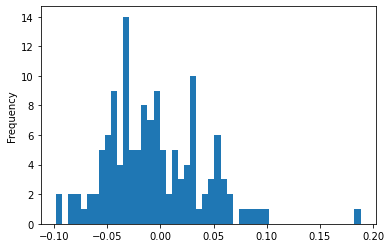

In [15]:
df_kahoot['Close'].pct_change().plot.hist(bins=50)

In [17]:
df_portfolio = pct_change_from_start(yf.Ticker(nor_portfolio_companies_ticker[0]).history(period="ytd")[['Close']])
for i in range(1, len(nor_portfolio_companies_ticker)):
    pd.merge(df_portfolio, pct_change_from_start(yf.Ticker(nor_portfolio_companies_ticker[i]).history(period="ytd")[['Close']])), left_index=True, right_index=True)


# df_kahoot = yf.Ticker(companiesInPortfolioTicker[0]+'.OL').history(period="ytd")
# df_napatech = yf.Ticker(companiesInPortfolioTicker[1]+'.OL').history(period="ytd")
# df_orkla = yf.Ticker(companiesInPortfolioTicker[2]+'.OL').history(period="ytd")

#df_portfolio = pd.DataFrame(df_kahoot['Close'])
df_portfolio.head()

SyntaxError: cannot assign to function call (3385437938.py, line 3)

In [22]:
df_portfolio = pd.merge(df_kahoot[['Close']], df_orkla[['Close']], left_index=True, right_index=True)
df_portfolio.columns = ['Kahoot', 'Orkla']
df_portfolio

,Kahoot,Orkla
Date,,
2022-01-03,50.400002,83.462502
2022-01-04,46.599998,84.615028
2022-01-05,48.000000,84.038765
2022-01-06,45.000000,83.769844
2022-01-07,44.480000,83.039902
...,...,...
2022-07-13,18.570000,82.019997
2022-07-14,18.485001,81.080002
2022-07-15,18.480000,81.459999


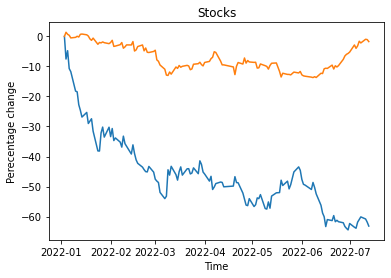

In [ ]:
plt.plot(pct_change_from_start(df_kahoot[['Close']]), label='Kahoot!')
plt.plot(pct_change_from_start(df_orkla[['Close']]), label='Orkla')
plt.title('Stocks')
plt.xlabel('Time')
plt.ylabel('Perecentage change')
plt.show()

In [ ]:
fig = go.Figure()

n = df_spot_pred_weekly_avg.shape[1]
for i in range(n):
    fig.add_trace(go.Scatter(x=df_spot_pred_weekly_avg.index, y=df_spot_pred_weekly_avg.iloc[:, i], name=list(df_spot_pred_weekly_avg.iloc[:, [i]].columns.values)[0], line_color="#777"))

fig.add_trace(go.Scatter(x=df_actual_spot_price_weekly_avg.index, y=df_actual_spot_price_weekly_avg.iloc[:, 0], name="SPOTNO3", line_color="blue"))
fig.add_trace(go.Scatter(x=df_mc_commodities.index, y=df_mc_commodities.iloc[:, 0], name="MC Coal API2 €", line_color="lightblue"))
fig.add_trace(go.Scatter(x=df_mc_commodities.index, y=df_mc_commodities.iloc[:, 1], name="MC gas €", line_color="pink"))

fig.update_layout(
    title="All predictions from EMPS and Actual Spot Price",
    xaxis_title="Date",
    yaxis_title="Amount in Euro (€)",
    legend_title="Year of origin"
)

fig.show()

In [ ]:
df_merged = pd.merge(df_actual_spot_price_weekly_avg, df_mc_commodities, left_index=True, right_index=True)

fig = px.line(df_merged, y=df_merged.columns)
fig.update_layout(
        title="Weekly Average of Spot and Marginal Thermal Prices",
        xaxis_title="Date",
        yaxis_title="Amount in Euro (€)",
        legend_title="Description"
    )
fig.show()

In [ ]:
def buy_stock(ticker, price, n_shares, date):
    print("tbc")

def sell_stock(ticker, price, n_shares, date):
    print("tbc")